<a href="https://colab.research.google.com/github/Lemito66/Maestria/blob/master/Copia_de_dataviz_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción a la Visualización de Datos con Python**

## Mejores tipos de datos

### 1. **Distribución de una Variable Numérica:**
   - **Distplot:** Ideal para visualizar la distribución de una variable numérica.
   - **Boxplot:** Útil para entender la distribución y detectar outliers.
   - **Violinplot:** Combinación de un boxplot y un distplot, muestra la distribución y su densidad.

### 2. **Relación entre Variables Numéricas:**
   - **Scatterplot:** Perfecto para visualizar la relación entre dos variables numéricas.
   - **Lineplot:** Bueno para visualizar tendencias a lo largo del tiempo o en relación con otra variable numérica continua.
   - **Regplot / lmplot:** Ideal para visualizar la relación lineal entre dos variables numéricas y ajustar una línea de regresión.

### 3. **Comparación entre Categorías:**
   - **Barplot:** Excelente para comparar una variable numérica a través de diferentes categorías.
   - **Countplot:** Ideal para visualizar la cantidad de ocurrencias de categorías en una variable categórica.
   - **Swarmplot:** Útil para visualizar la distribución de valores para una variable numérica agrupada por una variable categórica.

### 4. **Relación entre Variables Categóricas y Numéricas:**
   - **Boxplot:** Bueno para visualizar la distribución de una variable numérica agrupada por una variable categórica.
   - **Violinplot:** Útil para visualizar tanto la distribución como la densidad de una variable numérica agrupada por una variable categórica.

### 5. **Visualización de Datos Multivariantes:**
   - **Pairplot:** Bueno para visualizar relaciones entre pares de variables numéricas en un conjunto de datos.
   - **Heatmap:** Ideal para visualizar matrices de correlación o tablas de contingencia.

### 6. **Visualización de Tendencias a lo largo del Tiempo:**
   - **Lineplot:** La mejor opción para visualizar tendencias numéricas a lo largo del tiempo.

### 7. **Visualización de Proporciones:**
   - **Pie chart (matplotlib):** Adecuado para visualizar proporciones de categorías en una variable categórica.


## **El Conjunto de Datos**

El conjunto de datos a utilizar en este seminario web es un archivo CSV llamado `employee_churn_trimmed.csv`, que contiene datos sobre empleados que renunciaron o se quedaron en sus trabajos. El propósito de la sesión de hoy es descubrir qué podría estar impulsando la rotación (churn) y presentar los hallazgos en gráficos bien realizados y estéticos.


_Datos del empleado:_
- `Age`: Edad del empleado.
- `Attrition`: ¿Renunciaron o no? (`Churned`, `Stayed`).
- `DistanceFromHome`: Distancia de la oficina a la casa del empleado en Km.
- `Education`: Grado de educación universitaria (`'Below College'`, `'College'`, `'Bachelor's degree'`, `'Master's degree'`, `'PhD'`).
- `EducationField`: Campo de estudio.
- `Gender`: Género del empleado (`'Male'`, `'Female'`).
- `MonthlyIncome`: Ingreso mensual en USD $.
- `PercentSalaryHike`: % de aumento de salario el año pasado.
- `PerformanceRating`: Calificación del Rendimiento del Empleado (`Low`, `Good`, `Great`, `Excellent`).
- `YearsAtCompany`: Número de años trabajados en la empresa.

_Respuestas de la encuesta:_
- `EnvironmentSatisfaction`: Calificación de la satisfacción del empleado con el entorno de trabajo (`Low`, `Good`, `Great`, `Excellent`).
- `JobInvolvement`: Calificación del involucramiento del empleado en el trabajo (`Low`, `Good`, `Great`, `Excellent`).
- `JobSatisfaction`: Calificación de la satisfacción laboral del empleado (`Low`, `Good`, `Great`, `Excellent`).
- `RelationshipSatisfaction`: Calificación de la satisfacción del empleado con las relaciones (`Low`, `Good`, `Great`, `Excellent`).
- `WorklifeBalance`: Calificación de la satisfacción del empleado con el equilibrio entre trabajo y vida personal (`Low`, `Good`, `Great`, `Excellent`).

In [ ]:
# Importing relevant packages with their ali
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
employee_churn = pd.read_csv('https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/employee_churned_trimmed.csv?raw=true', index_col = "Unnamed: 0")

In [ ]:
employee_churn.head()

,Age,Attrition,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,WorkLifeBalance,YearsAtCompany
0,41,Churned,1,College,Life Sciences,Good,Female,Great,Excellent,5993,11,Great,Low,80,Low,6
1,49,Stayed,8,Below College,Life Sciences,Great,Male,Good,Good,5130,23,Excellent,Excellent,80,Great,10
2,37,Churned,2,College,Other,Excellent,Male,Good,Great,2090,15,Great,Good,80,Great,0
3,33,Stayed,3,Master's degree,Life Sciences,Excellent,Female,Great,Great,2909,11,Great,Great,80,Great,8
4,27,Stayed,2,Below College,Medical,Low,Male,Great,Good,3468,12,Great,Excellent,80,Great,2


> #### **Conceptos Básicos de Visualización de Datos I:** _La anatomía de una figura_ `matplotlib`
>
> Cuando se usa una función simple de `matplotlib` o `seaborn` como `plt.plot(my_data)`, lo que `matplotlib` está haciendo en el fondo es crear tres objetos anidados.
>
> * El objeto **figure**, que podría considerarse como el contenedor del lienzo, o un objeto que contiene todos los ejes (gráficos) posibles.
>    * El(los) objeto(s) **axes**, que podrían considerarse como el(los) lienzo(s), o el gráfico donde estaremos añadiendo nuestras visualizaciones.
>       * Todo lo que compone el gráfico.
>
<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/stages_plot.png?raw=true" width="65%">
</p>


> - La **figure**, alberga en los ejes _(que es 1 ya que es solo un gráfico)_.
>    - Los **axes** _(Gráfico vacío)_  
>        - Todo lo que compone el gráfico _(Línea azul)_
<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/fig.gif?raw=true" width="55%">
</p>

## **Entendiendo nuestra base de empleados**

#### **¿Qué edad tiene nuestra base de empleados?**

Una visualización excelente para entender la distribución de una variable numérica podría ser el gráfico de distribución/estimación de densidad del kernel. A diferencia de un histograma, no está limitado por la cantidad de bins y representa mejor la distribución de una variable.

- `sns.distplot(..., color = "", kde_kws = {}, hist = True)`

  - `color` te permite elegir el color del gráfico.
  - `kde_kws` es un diccionario que te permite formatear la curva KDE.
  - `hist` te permite visualizar el histograma de los datos (`True` o `False`).

<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/distplot.png?raw=true" width="40%">
</p>

_**Algunas funciones auxiliares utilizadas**:_

- `plt.axvline(x, ymin = 0, ymax = 1, linestyle)` te permite añadir una línea vertical a tu gráfico.
  - `x`, `ymin` y `ymax` te permiten colocar tu línea.
  - `linestyle` te permite formatear tu línea.
- `plt.text(x, y, s, fontsize, style)` te permite añadir texto a tu gráfico.
  - `x`, `y` te permiten colocar tu texto.
  - `s` es el texto que se está escribiendo.
- `plt.xlabel(.., fontsize = , fontweight = )` añade etiqueta para el eje x.
- `plt.ylabel(.., fontsize = , fontweight = )` añade etiqueta para el eje y.
- `plt.title(.., fontsize = , fontweight = )` añade título.
- `plt.yticks(..)` te permite especificar lo que se muestra en el eje y.

In [ ]:
# Establecer el estilo de los gráficos a 'white'
# Esto configura un estilo con fondo blanco y líneas de cuadrícula mínimas.


# Otros estilos disponibles en Seaborn son:
# - 'darkgrid': Fondo oscuro con grillas visibles, útil para gráficos con muchos elementos.
# - 'whitegrid': Fondo blanco con grillas visibles, útil cuando se desea enfatizar la estructura del gráfico.
# - 'dark': Fondo oscuro sin grillas.
# - 'ticks': Fondo blanco con marcas en los ejes.

sns.set_style('dark')

In [ ]:
# Crear una nueva figura con un tamaño específico
# figsize=(7,5) especifica que la figura tendrá un ancho de 7 pulgadas y una altura de 5 pulgadas.
plt.figure(figsize=(7,5))

<Figure size 700x500 with 0 Axes>

<Figure size 700x500 with 0 Axes>

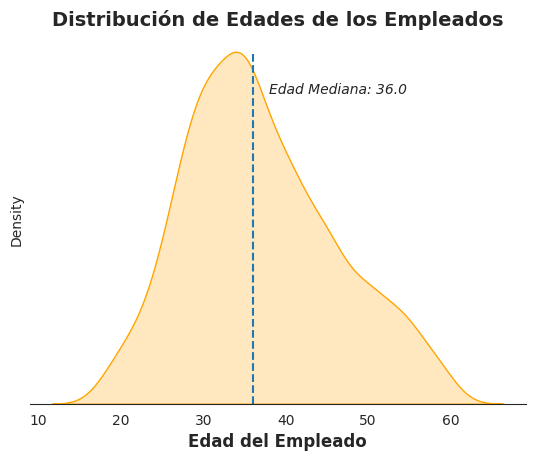

In [ ]:
# Crear gráfico
sns.kdeplot(employee_churn['Age'],
            # Establecer el color del gráfico de densidad
            color="orange",
            # Rellenar para mejorar la estética
            fill=True)

# Añadir línea vertical
plt.axvline(employee_churn['Age'].median(),
            # Establecer límite superior para la línea vertical
            ymax=0.95,
            # Establecer estilo de línea a "--"
            linestyle="--")

# Añadir la edad mediana de todos los empleados
plt.text(employee_churn['Age'].median() + 2, 0.04,
         # Crear texto
         'Edad Mediana: ' + str(employee_churn['Age'].median()),
         # Establecer estilo de texto
         fontsize=10,
         style="italic")

# Despine plot
sns.despine(left=True)
# Añadir toques finales
plt.yticks([])
plt.xlabel('Edad del Empleado', fontsize=12, fontweight="semibold")
plt.title('Distribución de Edades de los Empleados', fontsize=14, fontweight="semibold")
plt.show()

> #### **Conceptos Básicos de Visualización de Datos II:** _Subgráficos y múltiples ejes_
>
> Una de las características definitorias de la creación de visualizaciones con `matplotlib`, es el gran nivel de control ofrecido para crear múltiples gráficos a la vez. Como se discutió anteriormente, generar un gráfico requiere la creación de 3 objetos jerárquicos:
>
> * El objeto **figure**, que podría considerarse como el contenedor del lienzo, o un objeto que contiene todos los ejes posibles (gráficos).
>    * Los objeto(s) **axes**, que podrían considerarse como los lienzos, o el gráfico donde añadiremos nuestras visualizaciones.
>       * Todo lo que compone el gráfico.
>
> Crear una figura con múltiples subgráficos (ejes) es fácil y puede referenciarse de la siguiente manera:
>
> `figure, axes = plt.subplots(nrows = , ncols = , figsize = ...)`
>
> Aquí generamos un objeto `figure` y sus `axes`. Una `figure` puede dividirse en una cuadrícula de filas y columnas, donde cada "celda" en nuestras filas y columnas es un eje y podemos graficar algo dentro de él.
>
<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/subplots.gif?raw=true" width="55%">
</p>
>
> Por ejemplo, `figure, axes = plt.subplots(1, 2)` crea una figura con 2 ejes verticalmente uno encima del otro. El objeto `axes` es un array de numpy donde cada elemento es un puntero a un `axes`.
>
> Para crear visualizaciones dentro de un `axes`, la mayoría de las funciones de visualización tienen un argumento `ax` que nos permite decidir a qué visualización pertenece en qué ejes.
>
> Podemos personalizar el contenido del gráfico en cada `axes` utilizando métodos de `axes` que son casi iguales o similares a cómo usamos funciones auxiliares con `plt`. Para personalizar el primer `axes` en el gráfico de ejemplo anterior, usamos lo siguiente:
>
> - `plt.xlabel()` --> `axes[0].set_xlabel()`
> - `plt.text()` --> `axes[0].text()`
>
_No hay necesidad de memorizar la sintaxis aquí o las diferencias entre los métodos de `plt` y `axes`, solo sepa que la diferencia existe._


#### **¿Como se distribuye por age, por gender?**

In [ ]:
# Seleccionar solo los registros donde el 'Gender' es 'Male' (masculino) y calcular su edad mediana.

# 'male_churn' será un nuevo DataFrame que contiene solo los registros de empleados masculinos.
male_churn = employee_churn[employee_churn['Gender'] == "Male"]

# 'median_male_age' contendrá la edad mediana de los empleados masculinos.
median_male_age = male_churn['Age'].median()

# Seleccionar solo los registros donde el 'Gender' es 'Female' (femenino) y calcular su edad mediana.

# 'female_churn' será un nuevo DataFrame que contiene solo los registros de empleadas femeninas.
female_churn = employee_churn[employee_churn['Gender'] == "Female"]

# 'median_female_age' contendrá la edad mediana de las empleadas femeninas.
median_female_age = female_churn['Age'].median()


In [ ]:
male_churn

,Age,Attrition,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,WorkLifeBalance,YearsAtCompany
1,49,Stayed,8,Below College,Life Sciences,Great,Male,Good,Good,5130,23,Excellent,Excellent,80,Great,10
2,37,Churned,2,College,Other,Excellent,Male,Good,Great,2090,15,Great,Good,80,Great,0
4,27,Stayed,2,Below College,Medical,Low,Male,Great,Good,3468,12,Great,Excellent,80,Great,2
5,32,Stayed,2,College,Life Sciences,Excellent,Male,Great,Excellent,3068,13,Great,Great,80,Good,7
7,30,Stayed,24,Below College,Life Sciences,Excellent,Male,Great,Great,2693,22,Excellent,Good,80,Great,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Stayed,23,College,Medical,Great,Male,Excellent,Excellent,2571,17,Great,Great,80,Great,5
1466,39,Stayed,6,Below College,Medical,Excellent,Male,Good,Low,9991,15,Great,Low,80,Great,7
1467,27,Stayed,4,Bachelor's degree,Life Sciences,Good,Male,Excellent,Good,6142,20,Excellent,Good,80,Great,6
1468,49,Stayed,2,Bachelor's degree,Medical,Excellent,Male,Good,Good,5390,14,Great,Excellent,80,Good,9


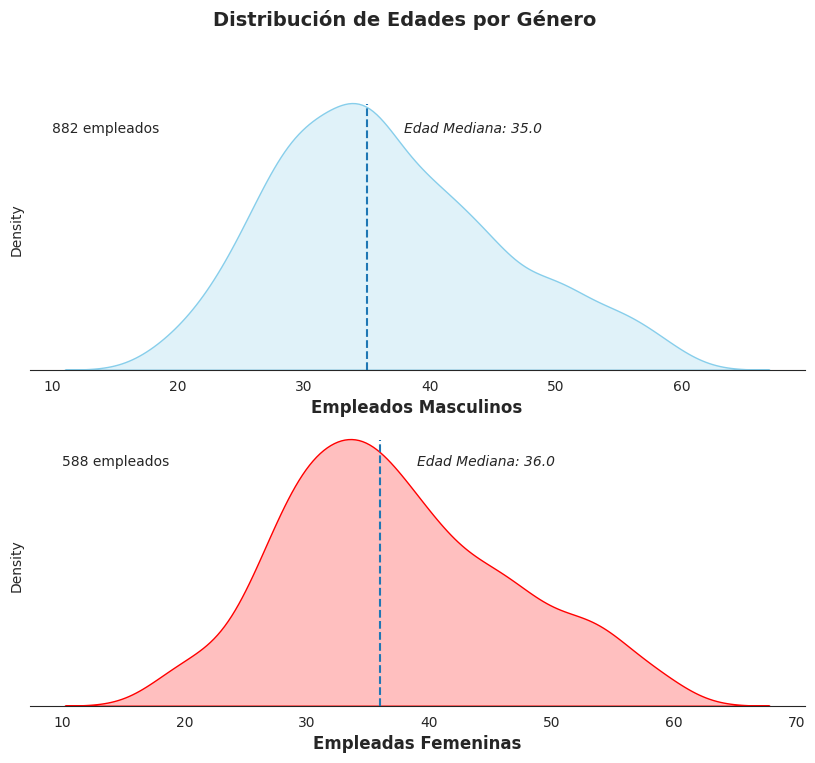

In [ ]:
# Configurar las opciones iniciales del gráfico
sns.set_style('white')

# Crear figura y ejes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Crear gráfico de la distribución de edades de empleados masculinos en el primer eje
sns.kdeplot(male_churn['Age'],
            color="skyblue",
            fill=True,  # Rellenar el gráfico de densidad
            ax=axes[0])  # Dibujar en el primer eje

# Añadir línea vertical y anotar la edad mediana para empleados masculinos en el primer eje
axes[0].axvline(median_male_age, ymax=0.95, linestyle="--")
axes[0].text(median_male_age + 3, 0.04, 'Edad Mediana: ' + str(median_male_age), fontsize=10, style="italic")
# Añadir número de empleados masculinos para contexto
axes[0].text(10, 0.04, str(male_churn.shape[0]) + " empleados", fontsize=10)
# Formatear subplot en ejes
axes[0].set_yticks([])
axes[0].set_xlabel("Empleados Masculinos", fontsize=12, fontweight="semibold")


# Crear gráfico de la distribución de edades de empleadas femeninas en el segundo eje
sns.kdeplot(female_churn['Age'],
            color="r",
            fill=True,  # Rellenar el gráfico de densidad
            ax=axes[1])  # Dibujar en el segundo eje

# Añadir línea vertical y anotar la edad mediana para empleadas femeninas en el segundo eje
axes[1].axvline(median_female_age, ymax=0.95, linestyle="--")
axes[1].text(median_female_age + 3, 0.04, 'Edad Mediana: ' + str(median_female_age), fontsize=10, style="italic")
# Añadir número de empleadas femeninas para contexto
axes[1].text(10, 0.04, str(female_churn.shape[0]) + " empleados", fontsize=10)
axes[1].set_yticks([])
axes[1].set_xlabel("Empleadas Femeninas", fontsize=12, fontweight="semibold")

# Quitar los bordes izquierdos de los gráficos
sns.despine(left=True)

# Formatear la figura final
fig.suptitle('Distribución de Edades por Género', fontsize=14, fontweight="semibold")
plt.show()


#### **¿Cuál es el nivel educativo de nuestros empleados por género?**

Una excelente manera de contar la distribución de datos categóricos es mediante un gráfico de conteo (countplot), que se puede realizar de la siguiente manera:

```python
sns.countplot(x= , hue= , data= , order=, palette= , alpha= )
```

- `x` es la variable categórica que queremos contar y `order` nos permite establecer el orden de las categorías visualizadas.
- `hue` es una columna que queremos agrupar y categorizar en nuestra visualización.
- `data` es nuestra fuente de datos.
- `order` nos permite ordenar nuestras categorías de `x`.
- `palette` y `alpha` nos permiten establecer el color por tono y su transparencia.

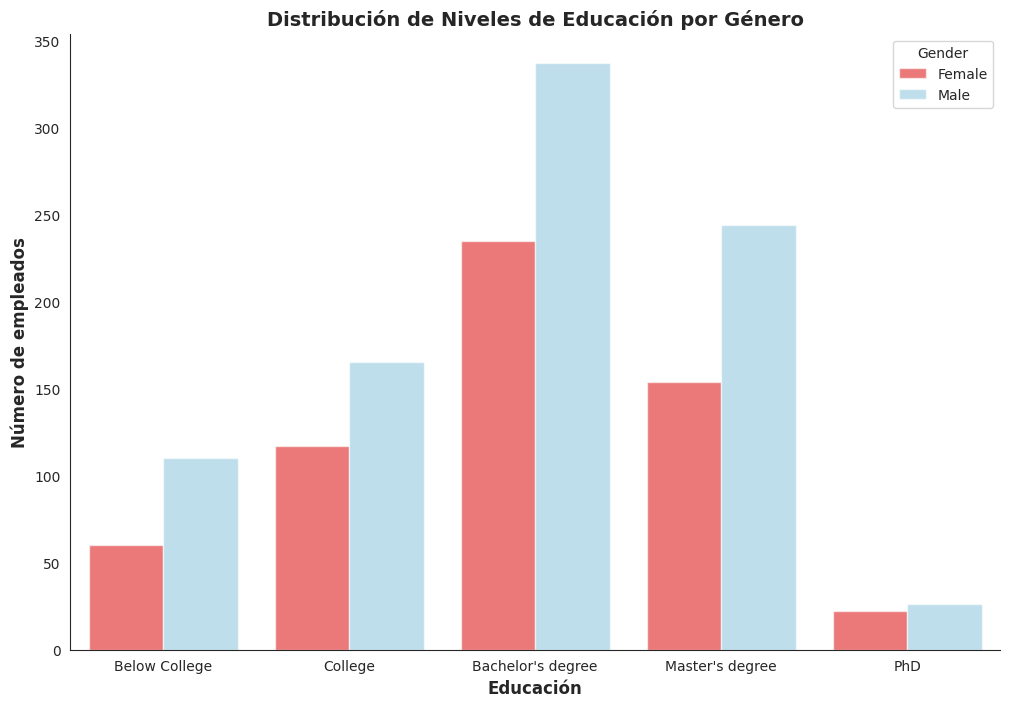

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')  # Establecer el estilo del fondo del gráfico a blanco
plt.figure(figsize=(12, 8))  # Definir el tamaño de la figura del gráfico

# Crear un gráfico de conteo (countplot)
sns.countplot(x='Education',  # Seleccionar la variable categórica 'Education' para el eje x
              hue='Gender',  # Agrupar por 'Gender' para visualizar comparación entre categorías
              data=employee_churn,  # Especificar el DataFrame fuente de los datos
              order=['Below College', 'College', "Bachelor's degree", "Master's degree", 'PhD'],  # Ordenar las categorías en el eje x
              palette=["r", "skyblue"],  # Establecer los colores de las barras para cada categoría de 'Gender'
              alpha=0.6)  # Establecer la transparencia de las barras

# Quitar los bordes superior y derecho del gráfico para una mejor estética
sns.despine()

# Añadir toques finales de estilo
plt.ylabel("Número de empleados", fontsize=12, fontweight="semibold")  # Etiqueta del eje y
plt.xlabel("Educación", fontsize=12, fontweight="semibold")  # Etiqueta del eje x
plt.title("Distribución de Niveles de Educación por Género", fontweight="semibold", fontsize=14)  # Título del gráfico

# Mostrar el gráfico
plt.show()


## **Entendiendo a quienes dejan la empresa vs quienes no**
#### **¿Existe una relación entre la Edad o la Distancia desde el Hogar (KM) y dejar la compañía?**

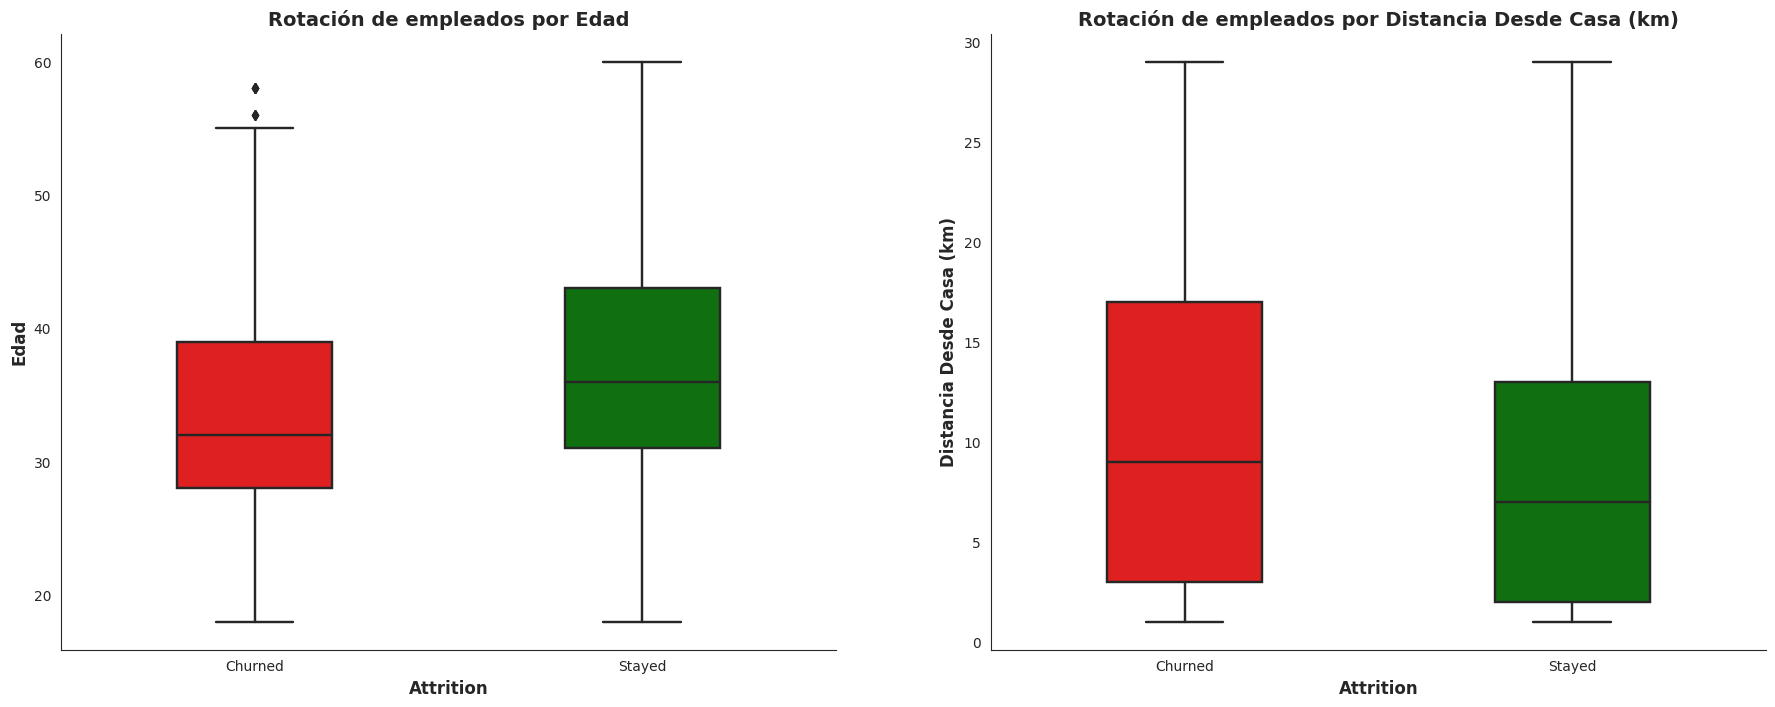

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')

# Crear listas auxiliares
columns_to_plot = ['Age', "DistanceFromHome"]
titles_to_plot = ["Edad", "Distancia Desde Casa (km)"]

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# Iterar sobre cada eje, y graficar un boxplot con columnas/títulos relevantes
for ax, column, title in zip(axes, columns_to_plot, titles_to_plot):

  # Crear un boxplot
  sns.boxplot(x="Attrition",  # Variable categórica para el eje x
              y=column,  # Cada columna de la lista columns_to_plot para el eje y
              data=employee_churn,  # DataFrame fuente de los datos
              order=["Churned", "Stayed"],  # Orden de las categorías en el eje x
              width=0.4,  # Cambiar el ancho de cada box-plot
              linewidth=1.75,  # Cambiar el ancho de línea de cada box-plot
              palette=["r", "g"],  # Fijar colores de churned (rojo) vs stayed (verde)
              ax=ax)  # Asignar boxplot a un eje

  # Quitar los bordes del gráfico
  sns.despine()

  # Establecer estilos finales para cada eje
  ax.set_xlabel("Attrition", fontsize=12, fontweight="semibold")
  ax.set_ylabel(title, fontsize=12, fontweight="semibold")
  ax.set_title("Rotación de empleados por " + title, fontweight="semibold", fontsize=14)

# Mostrar el gráfico
plt.show()


#### **¿Qué opinan quienes dejan la empresa vs quienes no, acerca de trabajar para nosotros?**

In [ ]:
# Calcular la proporción de RelationshipSatisfaction por categorías de Attrition
relationship_attrition = pd.crosstab(employee_churn['RelationshipSatisfaction'],
                                     employee_churn['Attrition'],
                                     # Encontrar proporciones a través de las filas
                                     normalize="index").reset_index()

# Unificar proporciones como porcentajes
relationship_attrition[['Churned', 'Stayed']] = relationship_attrition[['Churned', 'Stayed']] * 100
relationship_attrition['Total'] = relationship_attrition['Churned'] + relationship_attrition['Stayed']

# Ver cambios
relationship_attrition


Attrition,RelationshipSatisfaction,Churned,Stayed,Total
0,Excellent,14.814815,85.185185,100.0
1,Good,14.851485,85.148515,100.0
2,Great,15.468410,84.531590,100.0
3,Low,20.652174,79.347826,100.0


### Explicación de crosstab
La función `pd.crosstab` de pandas se utiliza para crear una tabla cruzada que proporciona la frecuencia de ocurrencia de los valores únicos de una variable en función de otra variable. Es útil para entender la relación entre dos variables categóricas.

### Sintaxis Básica:
```python
pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```

### Parámetros Principales:
- `index`: Variable que quieres ver en las filas.
- `columns`: Variable que quieres ver en las columnas.
- `values`: Variable opcional para agregar en caso de que se quiera aplicar una función de agregación.
- `aggfunc`: Función de agregación (por ejemplo, 'mean', 'sum') a aplicar en caso de que se pase una variable `values`.
- `margins`: Si es True, añade una fila/columna de totales (subtotales).
- `normalize`: Puede ser False, 'all', 'index' o 'columns'. Si se pasa 'all' o True, se normalizará sobre todos los valores. Si se pasa 'index', se normalizará sobre cada fila. Si se pasa 'columns', se normalizará sobre cada columna.

### Ejemplo:

Supongamos que tienes el siguiente DataFrame:

```python
data = {
    'Genero': ['M', 'F', 'M', 'F', 'M'],
    'Preferencia': ['Manzana', 'Manzana', 'Banana', 'Manzana', 'Banana']
}
df = pd.DataFrame(data)
```

Si quieres ver la frecuencia de preferencias de frutas por género, podrías usar `pd.crosstab` de la siguiente manera:

```python
pd.crosstab(index=df['Genero'], columns=df['Preferencia'])
```

Esto te dará una tabla que muestra cuántos hombres y mujeres prefieren manzanas y bananas, respectivamente.

### Normalización:
Si deseas observar las proporciones en lugar de las frecuencias, puedes utilizar el parámetro `normalize`. Por ejemplo, si quieres las proporciones por fila, puedes hacer:

```python
pd.crosstab(index=df['Genero'], columns=df['Preferencia'], normalize='index')
```

Este código te dará las proporciones de preferencias de frutas por género.

-. **Calcular la Proporción de `RelationshipSatisfaction` por Categorías de `Attrition`**:
   - `pd.crosstab` crea una tabla de contingencia entre `RelationshipSatisfaction` y `Attrition`.
   - `normalize="index"` calcula las proporciones de `Churned` y `Stayed` por cada nivel de `RelationshipSatisfaction` a lo largo de las filas.

-. **Unificar Proporciones como Porcentajes**:
   - Multiplica las proporciones por 100 para convertirlas en porcentajes.
   - Suma las columnas `Churned` y `Stayed` para obtener el total, que será 100% para cada nivel de `RelationshipSatisfaction`, ya que se calculan porcentajes por fila.

-. **Ver Cambios**:
   - Muestra el DataFrame `relationship_attrition` modificado, que ahora contiene las proporciones de `Churned` y `Stayed` como porcentajes para cada nivel de `RelationshipSatisfaction`.

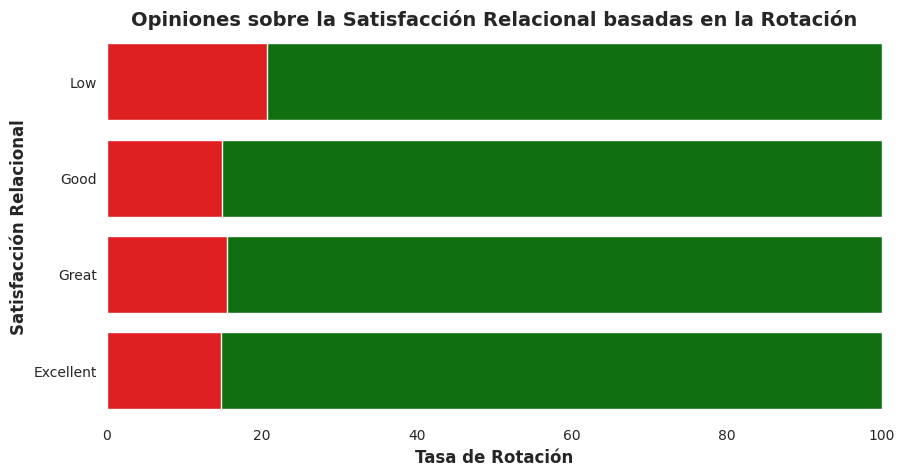

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')
plt.figure(figsize=(10, 5))

# Graficar primero el porcentaje total de empleados (es decir, 100%)
sns.barplot(x="Total",
            y="RelationshipSatisfaction",
            data=relationship_attrition,
            order=['Low', 'Good', 'Great', 'Excellent'],
            color="g")  # Verde para los que se quedaron

# Graficar el porcentaje de empleados que dejaron la empresa
sns.barplot(x="Churned",
            y="RelationshipSatisfaction",
            data=relationship_attrition,
            order=['Low', 'Good', 'Great', 'Excellent'],
            color="r")  # Rojo para los que dejaron la empresa

# Quitar los bordes del gráfico
sns.despine(left=True, bottom=True)

# Cambios finales de formato
plt.xlim(0, 100)  # Limitar el eje x entre 0 y 100
plt.xlabel("Tasa de Rotación", fontweight="semibold", fontsize=12)
plt.ylabel("Satisfacción Relacional", fontweight="semibold", fontsize=12)
plt.title("Opiniones sobre la Satisfacción Relacional basadas en la Rotación", fontweight="semibold", fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
# Asegurémonos de que el DataFrame df_melted tiene la columna 'variable'
df_melted = relationship_attrition.melt(id_vars='RelationshipSatisfaction',
                                        value_vars=['Churned', 'Total'],
                                        var_name='variable',
                                        value_name='value')
df_melted

,RelationshipSatisfaction,variable,value
0,Excellent,Churned,14.814815
1,Good,Churned,14.851485
2,Great,Churned,15.468410
3,Low,Churned,20.652174
4,Excellent,Total,100.000000
5,Good,Total,100.000000
6,Great,Total,100.000000
7,Low,Total,100.000000


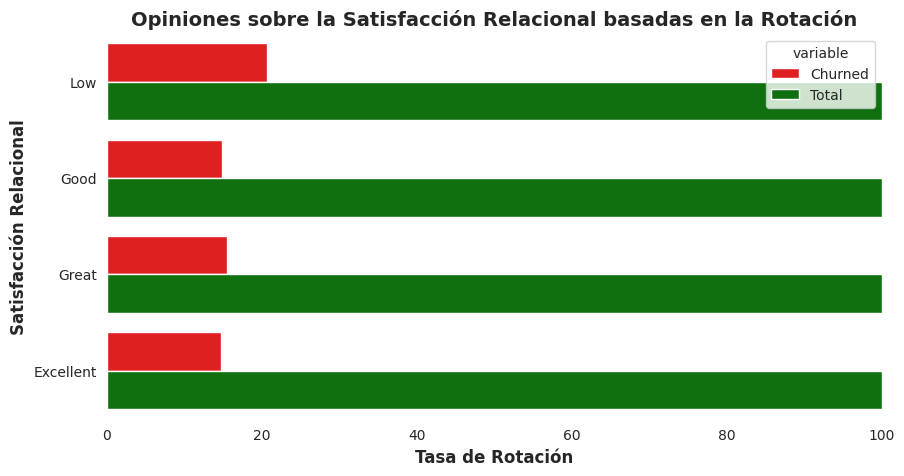

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')
plt.figure(figsize=(10, 5))

# Graficar el porcentaje total y el porcentaje de empleados que dejaron la empresa usando hue
sns.barplot(x='value',
            y='RelationshipSatisfaction',
            hue='variable',
            data=df_melted,
            order=['Low', 'Good', 'Great', 'Excellent'],
            palette=['r', 'g'])  # Rojo para los que dejaron la empresa, Verde para el total

# Quitar los bordes del gráfico
sns.despine(left=True, bottom=True)

# Cambios finales de formato
plt.xlim(0, 100)  # Limitar el eje x entre 0 y 100
plt.xlabel("Tasa de Rotación", fontweight="semibold", fontsize=12)
plt.ylabel("Satisfacción Relacional", fontweight="semibold", fontsize=12)
plt.title("Opiniones sobre la Satisfacción Relacional basadas en la Rotación", fontweight="semibold", fontsize=14)

# Mostrar el gráfico
plt.show()

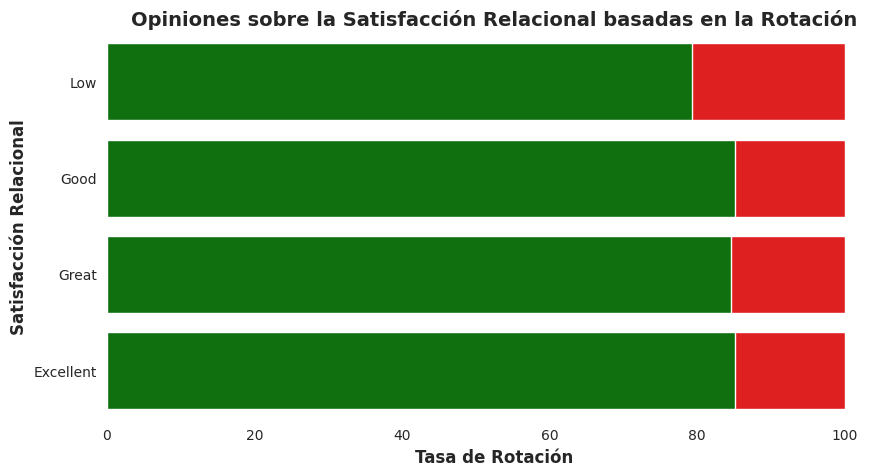

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')
plt.figure(figsize=(10, 5))

# Graficar primero el porcentaje total de empleados (es decir, 100%)
sns.barplot(x="Total",
            y="RelationshipSatisfaction",
            data=relationship_attrition,
            order=['Low', 'Good', 'Great', 'Excellent'],
            color="r")  # Verde representa el total de empleados

# Graficar el porcentaje de empleados que se quedaron en la empresa
# Este será el porcentaje total menos el porcentaje de los que dejaron la empresa
sns.barplot(x="Stayed",
            y="RelationshipSatisfaction",
            data=relationship_attrition,
            order=['Low', 'Good', 'Great', 'Excellent'],
            color="g")  # Azul para los que se quedaron

# Quitar los bordes del gráfico
sns.despine(left=True, bottom=True)

# Cambios finales de formato
plt.xlabel("Tasa de Rotación", fontweight="semibold", fontsize=12)
plt.ylabel("Satisfacción Relacional", fontweight="semibold", fontsize=12)
plt.title("Opiniones sobre la Satisfacción Relacional basadas en la Rotación", fontweight="semibold", fontsize=14)

# Mostrar el gráfico
plt.show()


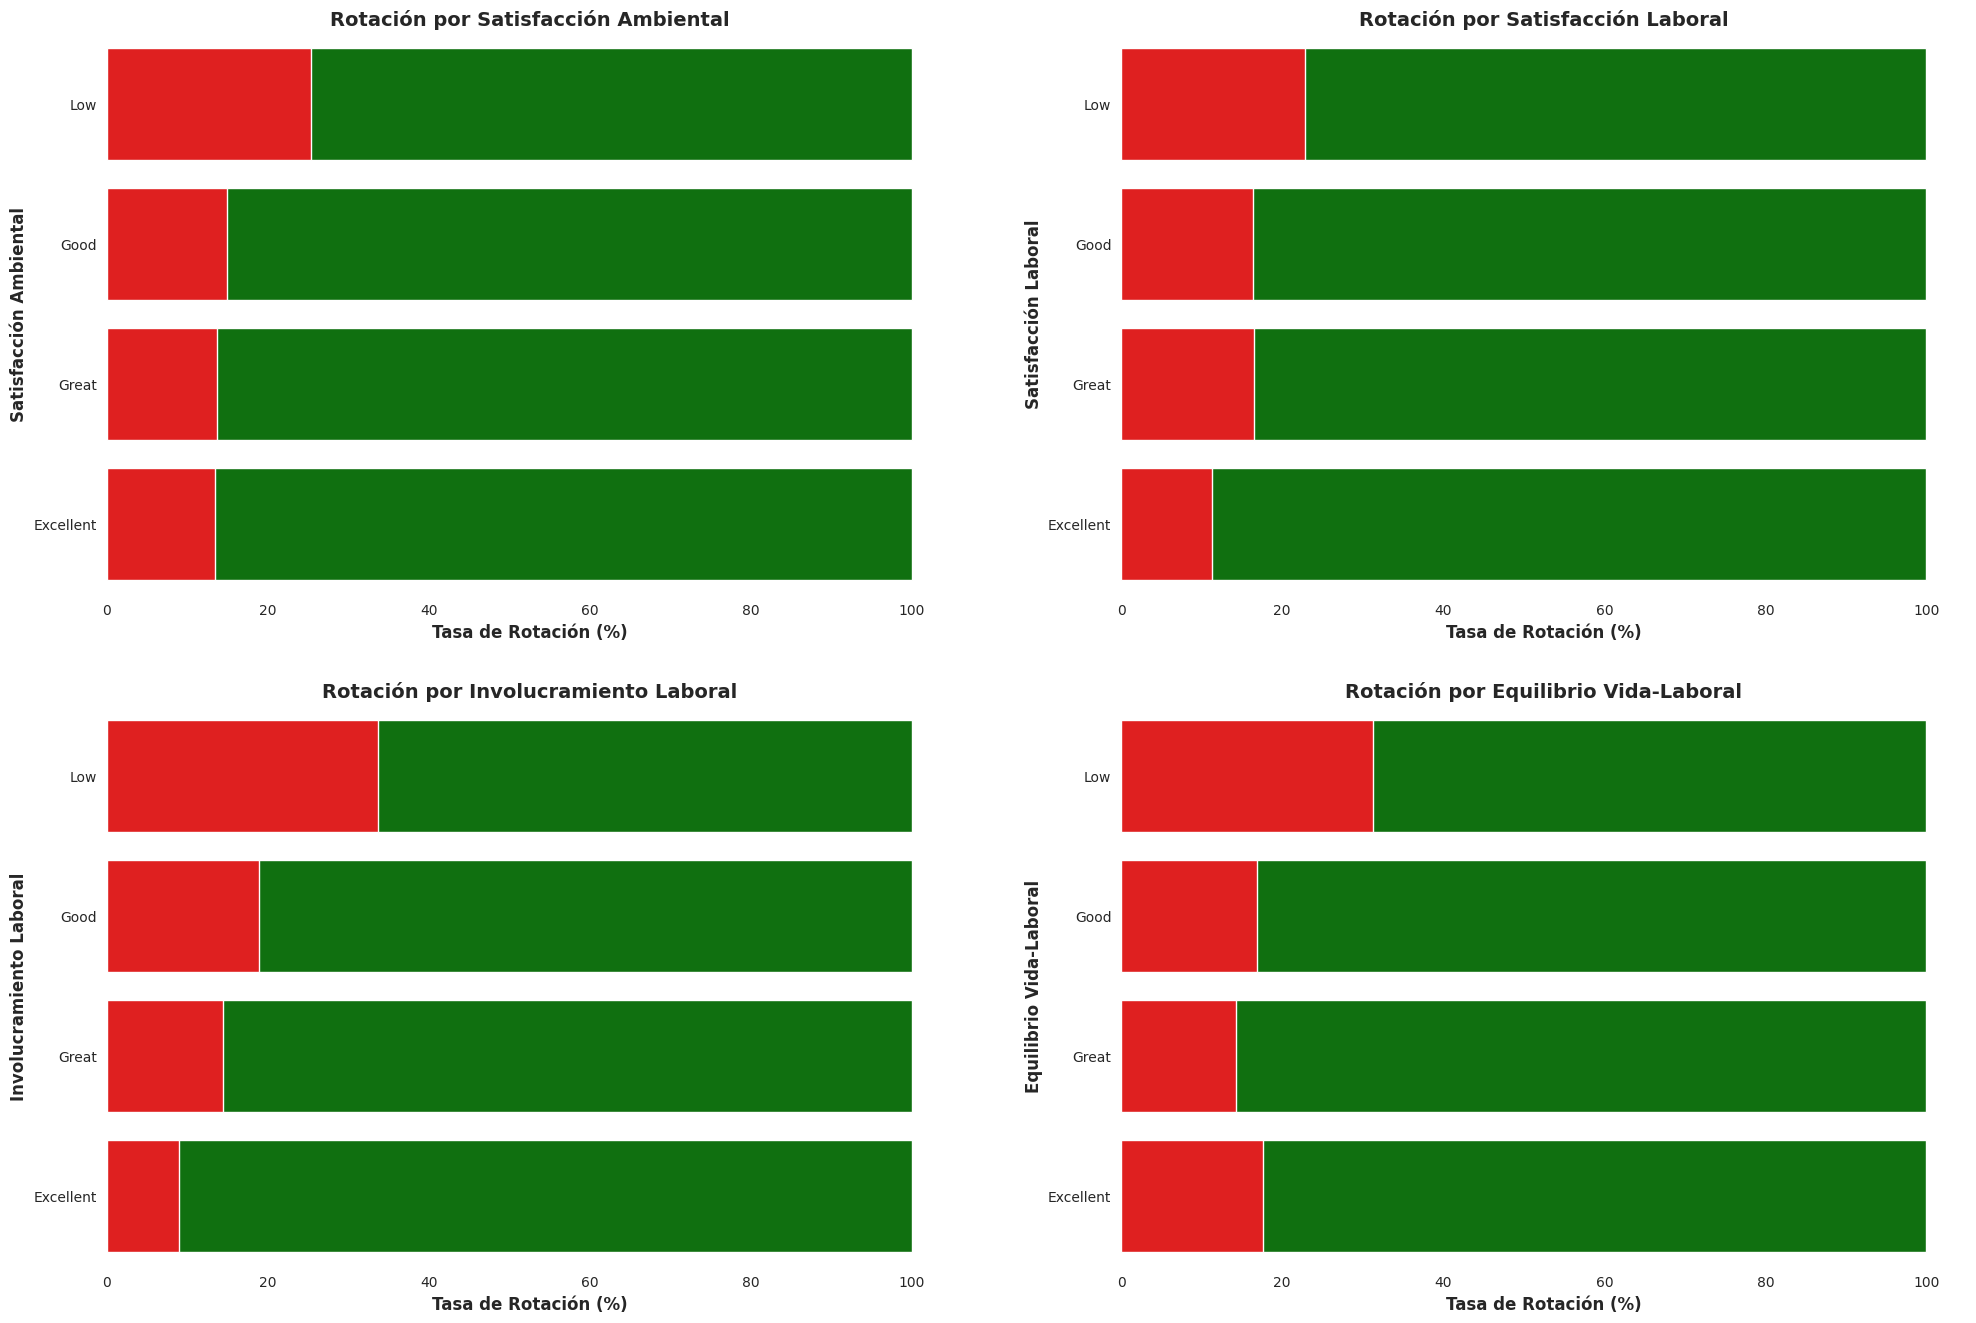

In [ ]:
# Para cada pregunta de la encuesta, se crean gráficos de barras apiladas que muestran la tasa de rotación.
# Se utilizan dos gráficos de barras por cada pregunta: uno para el total de empleados (en verde) y otro para los que dejaron la empresa (en rojo).
# Se configuran títulos, etiquetas de los ejes y otros aspectos del formato para cada gráfico de barras.


# Establecer opciones iniciales para el gráfico
sns.set_style('white')

# Crear listas auxiliares
survey_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
survey_titles = ["Satisfacción Ambiental", "Satisfacción Laboral", "Involucramiento Laboral", "Equilibrio Vida-Laboral"]


# Crear subgráficos - 2 filas, 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# Para cada elemento
# 'zip(axes.flatten(), survey_columns, survey_titles)' crea un iterador que devuelve tuplas donde cada tupla contiene:
# - un objeto 'ax' de 'axes.flatten()'
# - un string 'survey_question' de 'survey_columns'
# - un string 'survey_title' de 'survey_titles'
# Entonces, para cada iteración del bucle, 'ax', 'survey_question', y 'survey_title' toman los valores de cada tupla respectivamente.

for ax, survey_question, survey_title in zip(axes.flatten(), survey_columns, survey_titles):

  # Tabular cruzadamente los datos y generar proporciones para cada pregunta de la encuesta
  proportions = pd.crosstab(employee_churn[survey_question],
                            employee_churn['Attrition'],
                            # Encontrar proporciones a través de las filas
                            normalize="index").reset_index()

  # Convertir proporciones en porcentajes
  proportions[['Churned', 'Stayed']] = proportions[['Churned', 'Stayed']] * 100

  # Obtener columna total para cada pregunta de la encuesta
  proportions['Total'] = proportions['Churned'] + proportions['Stayed']

  # Graficar la barra Total
  sns.barplot(x="Total",
              y=survey_question,
              data=proportions,
              order=['Low', 'Good', 'Great', 'Excellent'],
              color="g",  # Verde para los que se quedaron
              ax=ax)

  # Graficar la barra Churned
  sns.barplot(x="Churned",
              y=survey_question,
              data=proportions,
              order=['Low', 'Good', 'Great', 'Excellent'],
              color="r",  # Rojo para los que dejaron la empresa
              ax=ax)

  # Quitar los bordes del gráfico
  sns.despine(left=True, bottom=True)

  # Establecer formato final
  ax.set_title("Rotación por " + survey_title, fontweight="semibold", fontsize=14)
  ax.set_ylabel(survey_title, fontsize=12, fontweight="semibold")
  ax.set_xlabel("Tasa de Rotación (%)", fontsize=12, fontweight="semibold")



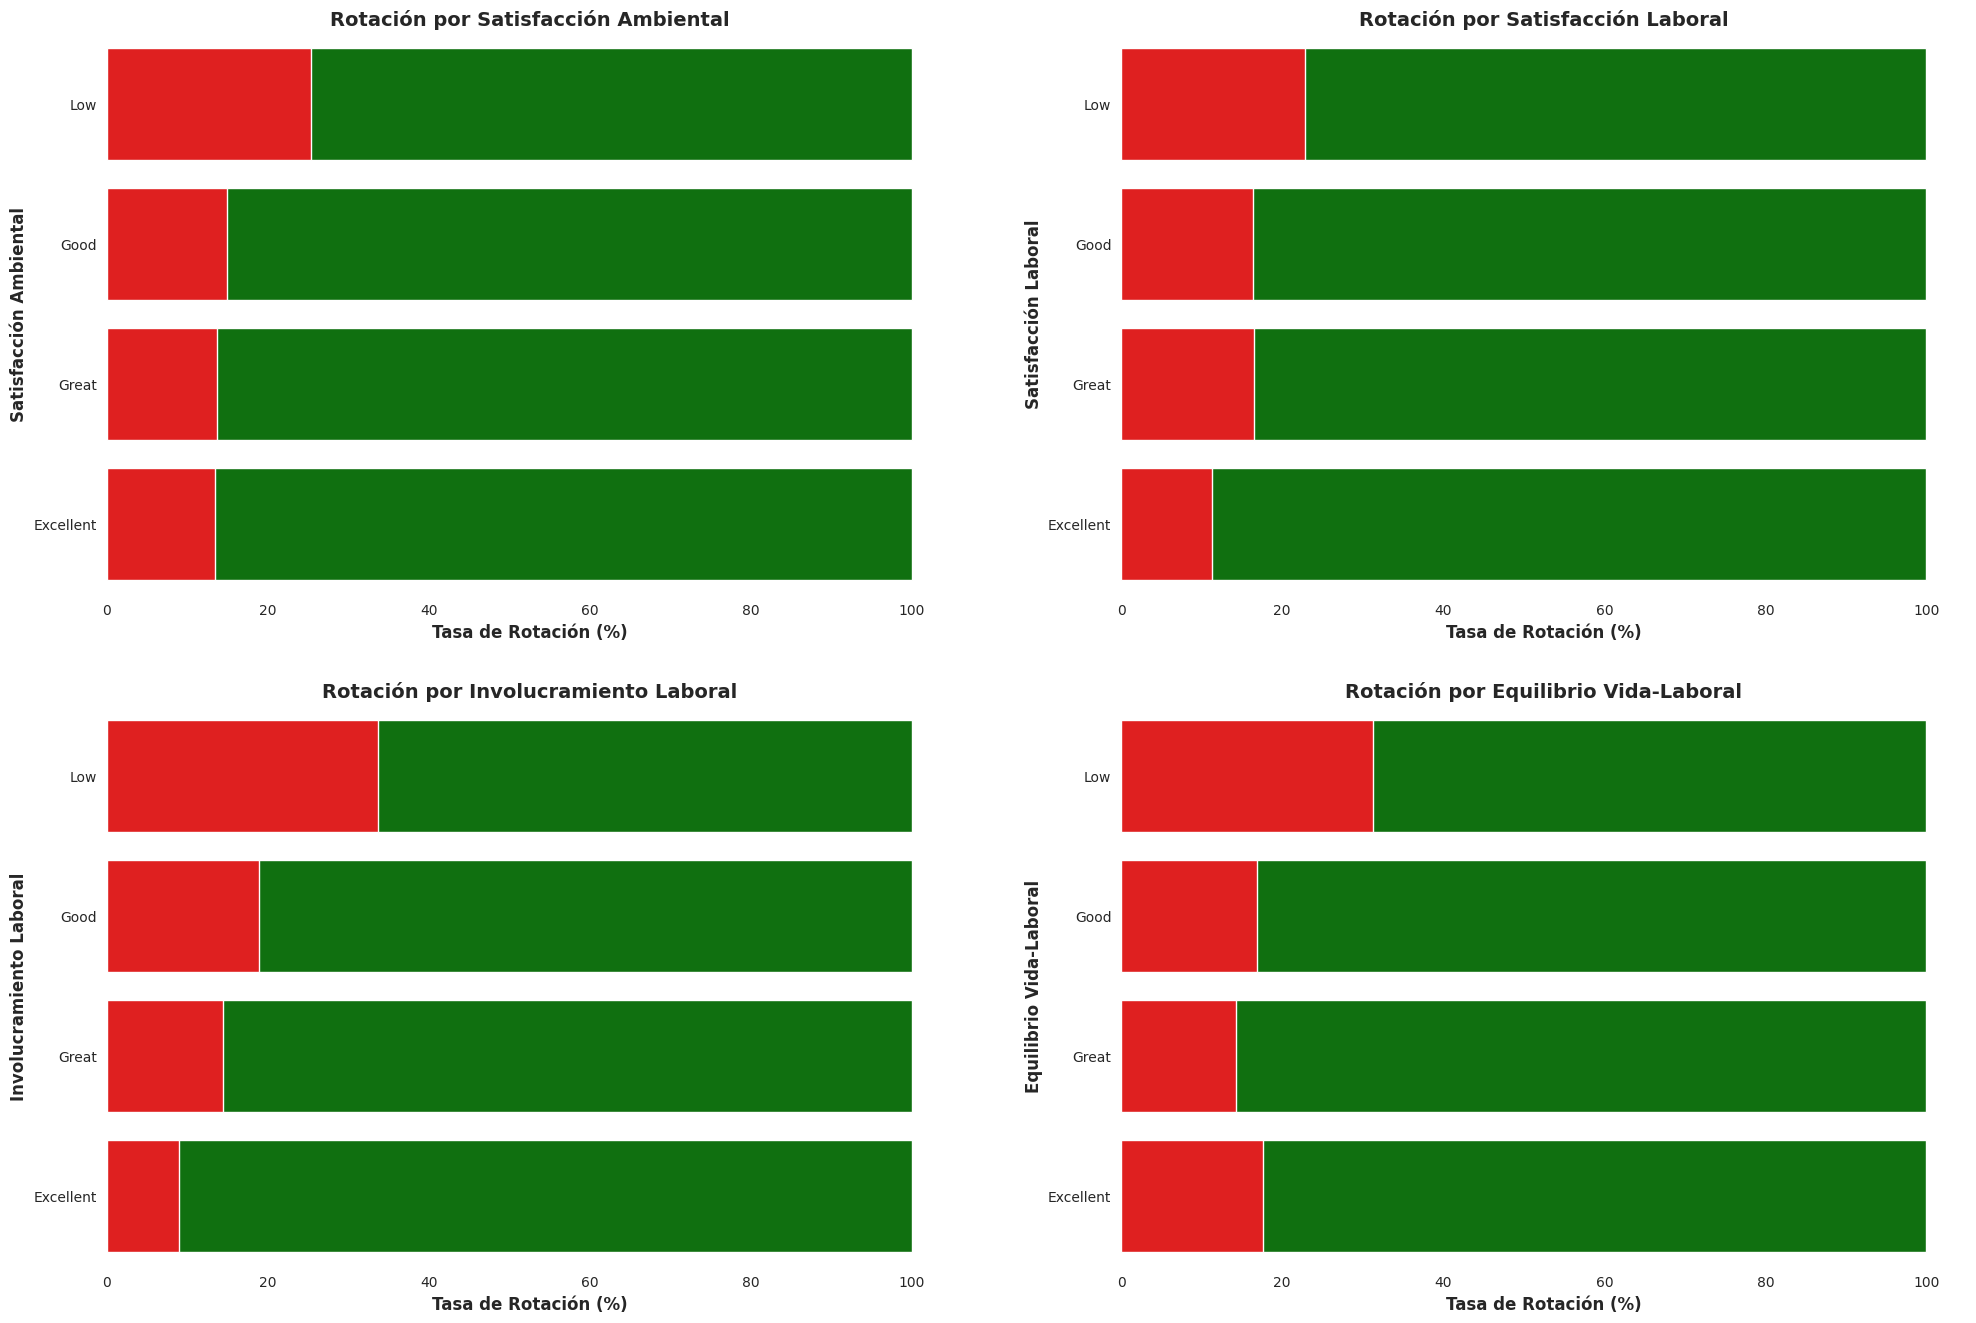

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define una función que crea un gráfico de barras apilado
def plot_stacked_bar(ax, data, question, title):
    # Tabula cruzadamente y encuentra las proporciones
    proportions = pd.crosstab(data[question], data['Attrition'], normalize="index").reset_index()
    proportions[['Churned', 'Stayed']] = proportions[['Churned', 'Stayed']] * 100
    proportions['Total'] = proportions['Churned'] + proportions['Stayed']

    # Crea los gráficos de barras
    sns.barplot(x="Total", y=question, data=proportions, order=['Low', 'Good', 'Great', 'Excellent'], color="g", ax=ax)
    sns.barplot(x="Churned", y=question, data=proportions, order=['Low', 'Good', 'Great', 'Excellent'], color="r", ax=ax)

    # Configura títulos y etiquetas
    ax.set_title("Rotación por " + title, fontweight="semibold", fontsize=14)
    ax.set_ylabel(title, fontsize=12, fontweight="semibold")
    ax.set_xlabel("Tasa de Rotación (%)", fontsize=12, fontweight="semibold")
    sns.despine(left=True, bottom=True)


# Establecer opciones iniciales para el gráfico
sns.set_style('white')
survey_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
survey_titles = ["Satisfacción Ambiental", "Satisfacción Laboral", "Involucramiento Laboral", "Equilibrio Vida-Laboral"]

# Crear subgráficos - 2 filas, 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# Llama a la función para cada subgráfico
for ax, survey_question, survey_title in zip(axes.flatten(), survey_columns, survey_titles):
    plot_stacked_bar(ax, employee_churn, survey_question, survey_title)


## **¿Qué iniciativas podrían disminuir la rotación de empleados?**

#### **¿Los salarios más altos generan menos rotación? ¿Es esto aplicable a todas las edades?**

Los diagramas de dispersión son una excelente manera de visualizar la relación entre dos valores numéricos y se pueden realizar de la siguiente manera:

- `sns.scatterplot(x=, y=, hue=, size=, style=, data=, palette=, alpha=)` donde:
  - `x`, `y` son los nombres de las columnas utilizadas en los ejes `x` e `y` y `data` es la fuente de datos.
  - `hue` nos permite agrupar por una columna diferente, `size` y `style` nos permiten establecer el tamaño y el estilo del marcador respectivamente por una columna.
  - `palette` y `alpha` controlan el color y la transparencia.


<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/scatterplot.png?raw=true" width="40%">
</p>



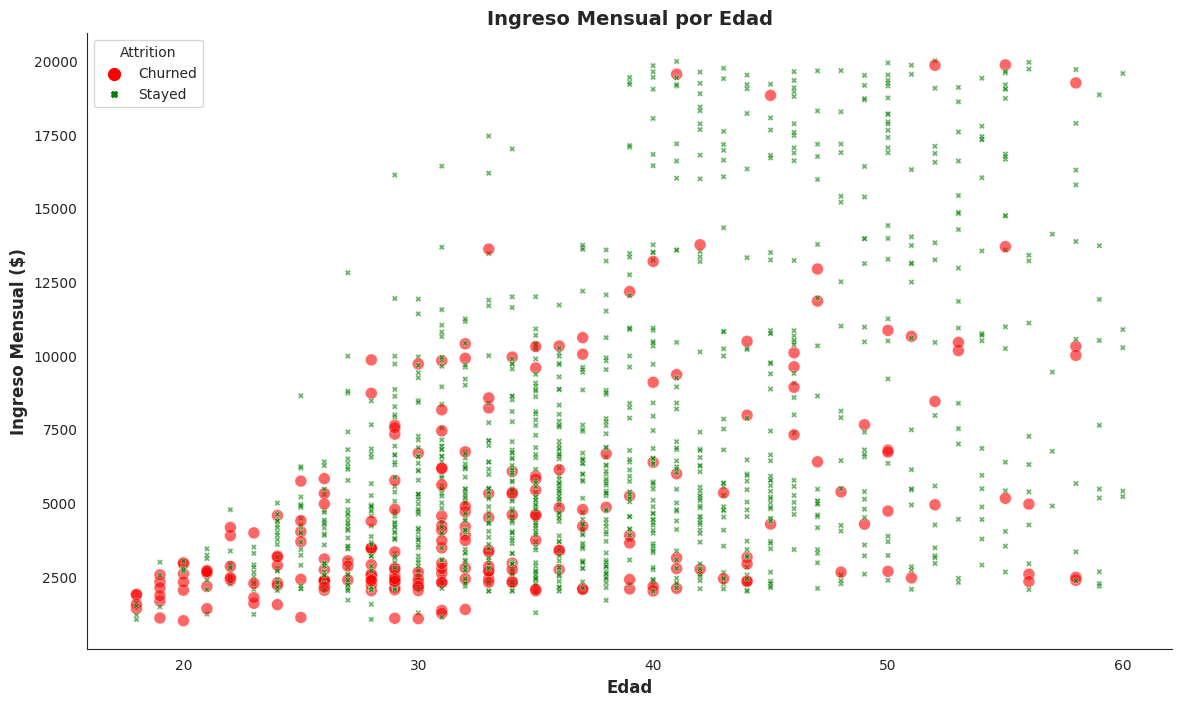

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')  # Configura el estilo del fondo del gráfico como blanco
plt.figure(figsize = (14, 8))  # Define el tamaño del gráfico

# Crear un diagrama de dispersión
sns.scatterplot(x = "Age",  # Establece la variable del eje x como "Age" (Edad)
                y = "MonthlyIncome",  # Establece la variable del eje y como "MonthlyIncome" (Ingreso Mensual)
                # Agrupar por y cambiar el estilo y tamaño del punto por "Attrition" (Rotación)
                hue = "Attrition",  # Cambia el color del punto por categorías de "Attrition" (Rotación)
                size = "Attrition",  # Cambia el tamaño del punto por categorías de "Attrition" (Rotación)
                style = "Attrition",  # Cambia el estilo del punto por categorías de "Attrition" (Rotación)
                data = employee_churn,  # Establece la fuente de datos
                # Cambiar el color de las categorías de "hue"
                palette = ["r", "g"],  # Establece los colores de los puntos: rojo para los que dejaron la empresa, verde para los que se quedaron
                alpha = 0.6)  # Establece la transparencia de los puntos

# Quitar los bordes del gráfico
sns.despine()  # Elimina las líneas del eje superior y derecho del gráfico

# Cambios finales de formato
plt.xlabel("Edad", fontsize = 12, fontweight = "semibold")  # Etiqueta del eje x
plt.ylabel("Ingreso Mensual ($)", fontsize = 12, fontweight = "semibold")  # Etiqueta del eje y
plt.title("Ingreso Mensual por Edad", fontsize = 14, fontweight = "semibold")  # Título del gráfico

# Mostrar el gráfico
plt.show()  # Visualiza el gráfico


#### **¿El aumento de salarios del año pasado impactó en la rotación?**

Similar a los diagramas de dispersión, los swarmplots están diseñados para mostrar la relación y distribución de valores para una variable categórica y una numérica. Se puede calcular de la siguiente manera:

- `sns.swarmplot(x= , y=, hue=, data=, order=, palette=, size=, alpha=)`
  - `x`, `y` son los nombres de las columnas usadas en los ejes `x` e `y` y `order` es el orden de las categorías que están siendo evaluadas.
  - `hue` nos permite agrupar por una columna diferente.
  - `palette`, `alpha` y `size` controlan el color, la transparencia y el tamaño del marcador.

<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/swarmplot.png?raw=true" width="40%">
</p>

In [ ]:
# Crear categorías para los aumentos de salario
employee_churn['raise_category'] = pd.cut(employee_churn['PercentSalaryHike'],
                                          # Definir puntos de corte 10-15, 15-20, 20-25
                                          [10, 15, 20, 25],
                                          # Definir etiquetas para las categorías
                                          labels=['10-15%', '15-20%', '20-25%'])

# pd.cut es una función de pandas que se utiliza para segmentar
# y clasificar los valores de datos en contenedores discretos,
# es decir, categorías o intervalos.

In [ ]:
employee_churn[['raise_category','PercentSalaryHike']]

,raise_category,PercentSalaryHike
0,10-15%,11
1,20-25%,23
2,10-15%,15
3,10-15%,11
4,10-15%,12
...,...,...
1465,15-20%,17
1466,10-15%,15
1467,15-20%,20
1468,10-15%,14


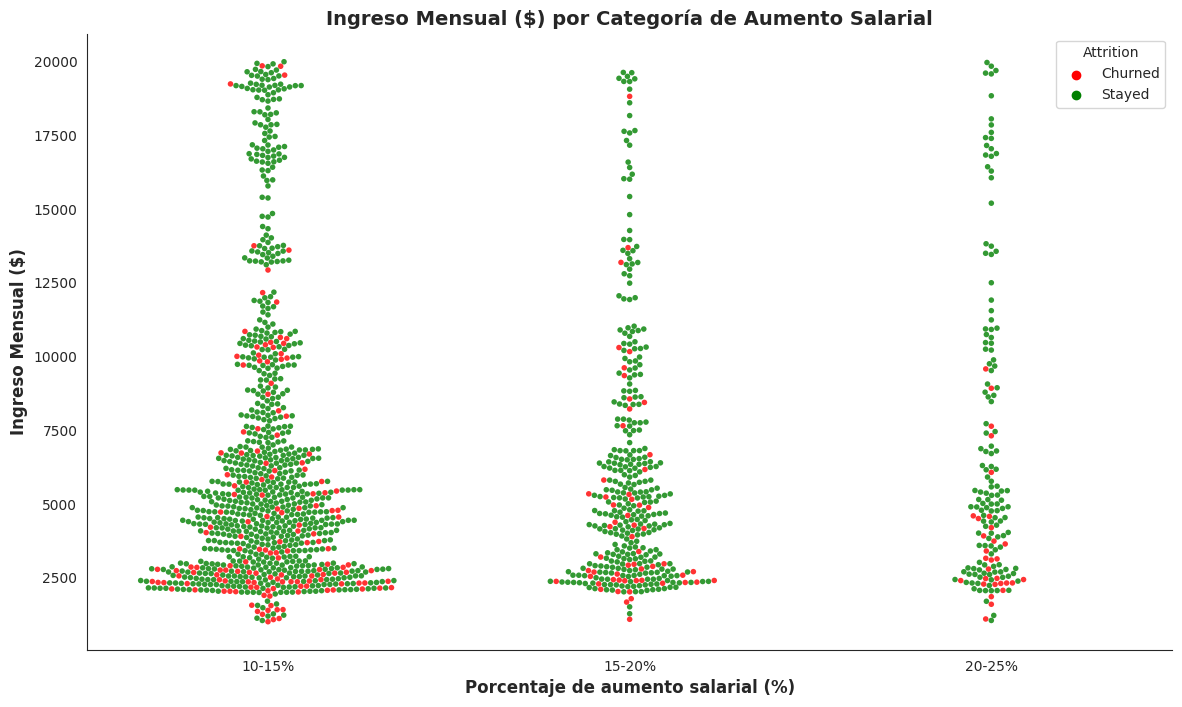

In [ ]:

# Establecer opciones iniciales para el gráfico
sns.set_style('white')
plt.figure(figsize=(14, 8))

# Crear swarmplot
sns.swarmplot(x = "raise_category",
              y = "MonthlyIncome",
              hue="Attrition",  # Colorear por rotación de empleados
              data=employee_churn,  # Fuente de datos
              # Ordenar categorías en el eje x
              order=['10-15%', '15-20%', '20-25%'],  # Orden de las categorías en el eje x
              # Cambiar color de las categorías de hue
              palette=['r', 'g'],  # Rojo para los que dejaron la empresa, verde para los que se quedaron
              # Cambiar tamaño y transparencia de cada punto
              size=4, alpha=0.8)  # Tamaño y transparencia de los puntos

# Quitar los bordes del gráfico
sns.despine()

# Toques de formato finales
plt.xlabel("Porcentaje de aumento salarial (%)", fontsize=12, fontweight="semibold")
plt.ylabel("Ingreso Mensual ($)", fontsize=12, fontweight="semibold")
plt.title("Ingreso Mensual ($) por Categoría de Aumento Salarial", fontsize=14, fontweight="semibold")

# Mostrar el gráfico
plt.show()


#### **¿El número de años pasados en la compañía afecta la rotación de empleados?**

Una de las visualizaciones más comunes a utilizar es el lineplot (gráfico de línea), que simplemente dibuja la relación entre dos variables como una línea. Podemos hacerlo con:

- `sns.lineplot(x= , y=, hue=, data=, style=, palette=, size=, markers=, ci=)`
  - `x`, `y` son los nombres de las columnas usadas en los ejes `x` e `y`.
  - `hue` nos permite agrupar por una columna diferente y `style` te permite ajustar el estilo de línea por categorías en una columna.
  - `palette`, `markers` y `ci` controlan el color, si se añaden puntos a las líneas, y si se añade un intervalo de confianza a tu línea.

<ipython-input-66-9d19e79a2215>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearsAtCompany',  # Años en la compañía en el eje x


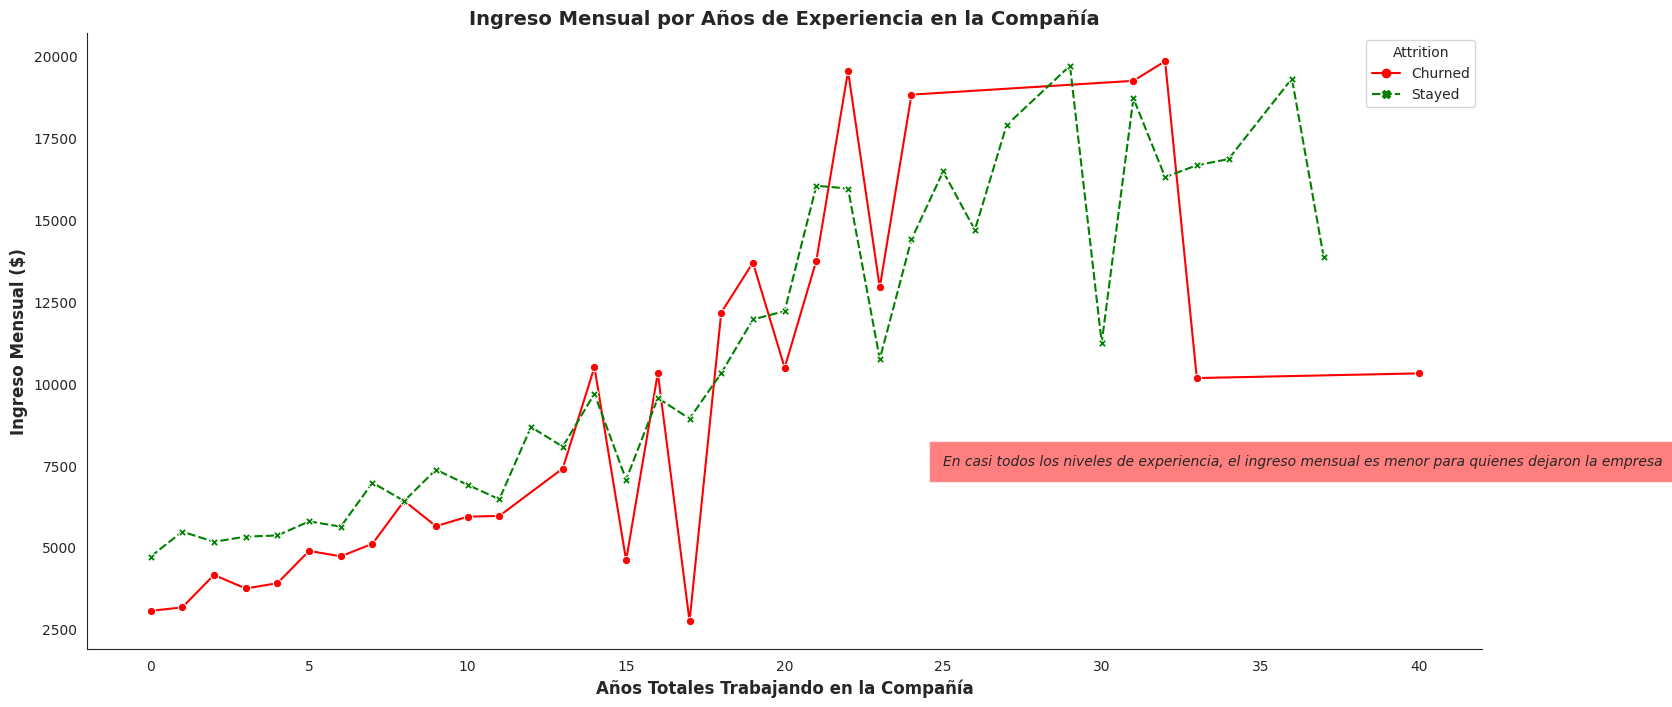

In [ ]:
# Establecer opciones iniciales para el gráfico
sns.set_style('white')
plt.figure(figsize=(18, 8))

# Crear un lineplot
sns.lineplot(x='YearsAtCompany',  # Años en la compañía en el eje x
             y="MonthlyIncome",  # Ingreso mensual en el eje y
             # Establecer el color y estilo de línea por Attrition
             hue="Attrition",  # Colorear por rotación de empleados
             style="Attrition",  # Estilo de línea por rotación de empleados
             data=employee_churn,  # Fuente de datos
             # Cambiar colores para cada categoría de hue
             palette=["r", "g"],  # Rojo para los que dejaron la empresa, verde para los que se quedaron
             # Añadir puntos al lineplot y remover el intervalo de confianza
             markers=True, ci=None)  # Mostrar marcadores y no mostrar intervalo de confianza

# Añadir texto para elaborar sobre las percepciones del gráfico
plt.text(25, 7500,
         # Añadir texto y darle estilo
         "En casi todos los niveles de experiencia, el ingreso mensual es menor para quienes dejaron la empresa",
         fontsize=10, style='italic',
         # Añadir un cuadro rojo alrededor del texto
         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

# Quitar los bordes del gráfico
sns.despine()

# Formateo final
plt.xlabel("Años Totales Trabajando en la Compañía", fontsize=12, fontweight="semibold")
plt.ylabel("Ingreso Mensual ($)", fontsize=12, fontweight="semibold")
plt.title("Ingreso Mensual por Años de Experiencia en la Compañía", fontsize=14, fontweight="semibold")

# Mostrar el gráfico
plt.show()
